# YOLOv8 - results
(perpendicular BB, rotated BB, added altituded information)

In [38]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from ultralytics import YOLO

RESULTS_PATH = 'out/'
yolov8_dir = RESULTS_PATH + 'yolov8s_v8_50e2'
yolov8_obb_dir = RESULTS_PATH + 'yolov8n-obb_50e'
yolov8_obb_alt_rot_dir = RESULTS_PATH + 'yolov8n-obb_50e_alt_rot'

TEST_DIR = 'data/images/test/'
DIR_LIST = [yolov8_dir, yolov8_obb_dir, yolov8_obb_alt_rot_dir]
MODEL_LIST = ['yolov8', 'yolov8_obb', 'yolov8_obb_alt_rot']

In [2]:
fin_epoch = 50
dfs = []

for i, model in enumerate(MODEL_LIST):
    df = pd.read_csv(DIR_LIST[i] + '/results.csv')
    df['model'] = model
    dfs.append(df)

df_all = pd.concat(dfs)
new_column_names = {col: col.replace(' ', '') for col in df_all.columns}
df_all.rename(columns=new_column_names, inplace=True)
df_all = df_all[df_all.epoch == fin_epoch]
df_all.drop(columns=['epoch'], inplace=True)
df_all.set_index('model', inplace=True)

In [39]:
# TODO: metrics explanation + notes
df_all.T

model,yolov8,yolov8_obb,yolov8_obb_alt_rot
train/box_loss,1.212600,1.025000,1.048700
train/cls_loss,0.593730,0.690690,0.698030
train/dfl_loss,0.845620,1.334700,1.356400
metrics/precision(B),0.798450,0.840430,0.805490
metrics/recall(B),0.593870,0.609070,0.624000
metrics/mAP50(B),0.656650,0.673280,0.706200
metrics/mAP50-95(B),0.382130,0.417080,0.425690
val/box_loss,1.180000,1.289000,1.288000
val/cls_loss,0.593800,0.758580,0.754270
val/dfl_loss,0.845680,1.506900,1.526900


## Example predictions

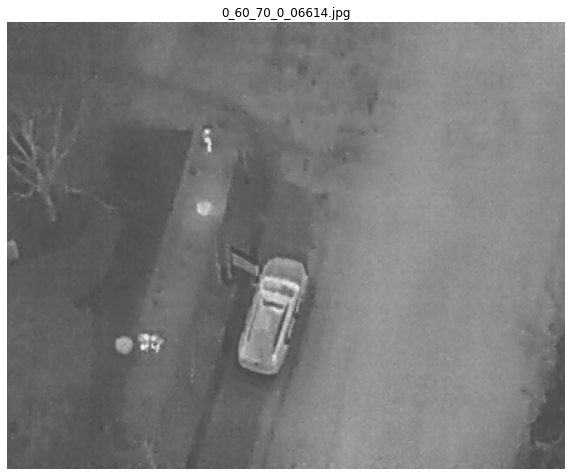

In [35]:
# example image
example_img = '0_60_70_0_06614.jpg'

fig = plt.figure(figsize=(10, 10))
e_img = cv2.imread(TEST_DIR + example_img)
plt.axis('off')
plt.imshow(e_img)
plt.title(example_img)
plt.show()

In [5]:
test_dirs = [TEST_DIR, TEST_DIR, 'data_rotated/images/test/']

for i, d in enumerate(DIR_LIST):
    model = YOLO(d + '/weights/best.pt')
    results = model(test_dirs[i] + example_img, save=True)


image 1/1 c:\Users\agata\Desktop\UNI\MSC\MP\thermal-segmentation\data\images\test\0_60_70_0_06614.jpg: 224x256 1 Person, 1 Car, 75.6ms
Speed: 1.0ms preprocess, 75.6ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 256)
Results saved to runs\detect\predict

image 1/1 c:\Users\agata\Desktop\UNI\MSC\MP\thermal-segmentation\data\images\test\0_60_70_0_06614.jpg: 416x512 110.7ms
Speed: 2.0ms preprocess, 110.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 512)
Results saved to runs\obb\predict

image 1/1 c:\Users\agata\Desktop\UNI\MSC\MP\thermal-segmentation\data_rotated\images\test\0_60_70_0_06614.jpg: 416x512 91.7ms
Speed: 2.0ms preprocess, 91.7ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 512)
Results saved to runs\obb\predict2


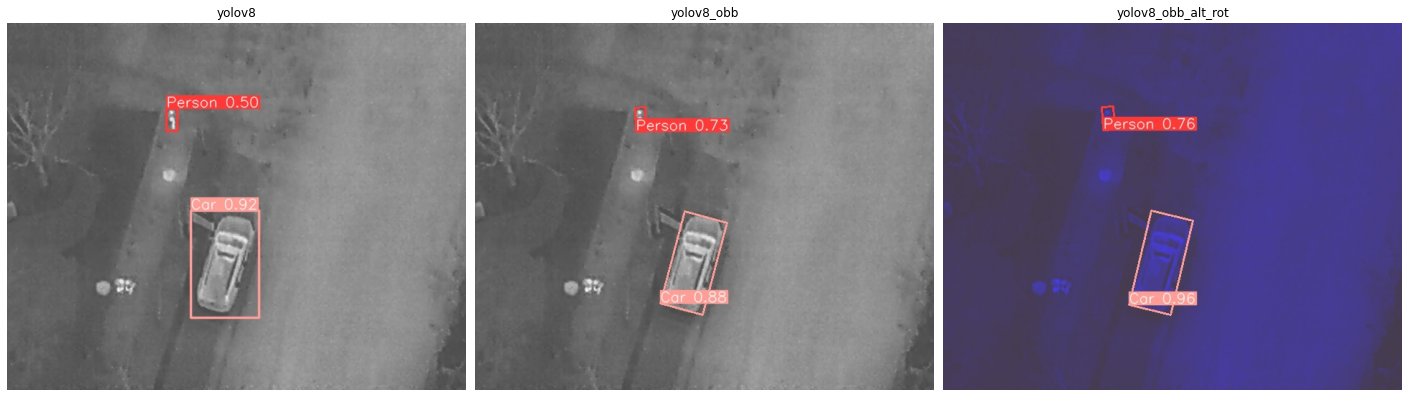

In [37]:
img_paths = [
    'runs/detect/predict/', 'runs/obb/predict/', 'runs/obb/predict2/'
    ]

fig, axs = plt.subplots(1, 3, figsize=(25, 15))
plt.subplots_adjust(wspace=0.02)

for i, img_path in enumerate(img_paths):
    img = mpimg.imread(img_path + example_img)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(MODEL_LIST[i])

plt.show()